In [1]:
import pandas as pd
housing_data = pd.read_csv('archive/housing.csv.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
#describe the data but idk how
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


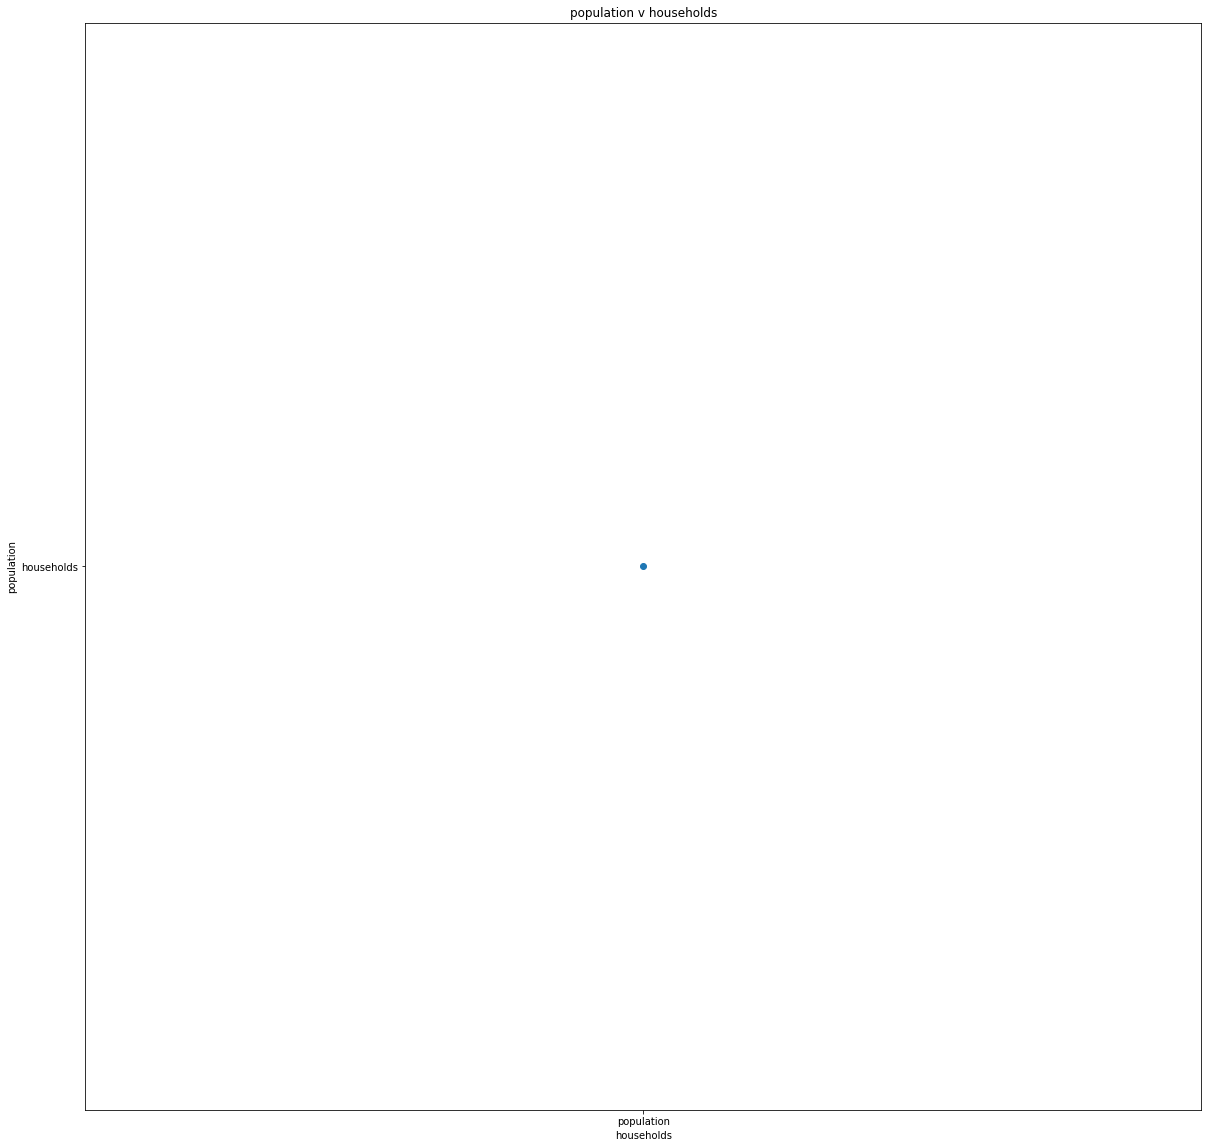

In [17]:
population = housing_data['population']
households = housing_data['households']

import matplotlib.pyplot as plt

median_data = housing_data[['population', 'households']]
plt.figure(figsize = (20,20))
plt.ylabel('population')
plt.xlabel('households')
plt.title('population v households')
plt.scatter('population', 'households')


In [13]:
import numpy as np
import statsmodels.api as sm


In [18]:
x_ary = housing_data['population']
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(housing_data['households'], x_with_cnst)
results = model.fit()
b,m = results.params
print(m)
print(b)

0.3062866811113317
62.93513925442739


In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             households   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 9.600e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:            -1.3414e+05
No. Observations:               20640   AIC:                         2.683e+05
Df Residuals:                   20638   BIC:                         2.683e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.9351      1.800     34.969      0.0

Text(0.5, 1.0, 'population v households')

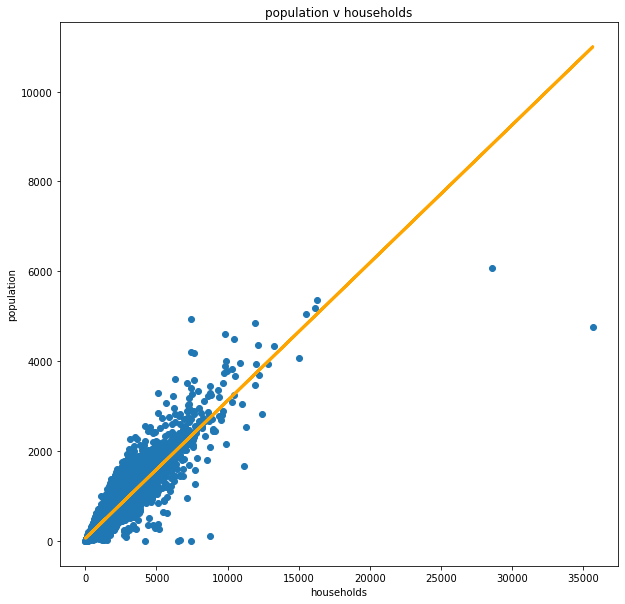

In [22]:
plt.figure(figsize = (10,10))
plt.scatter(housing_data['population'], housing_data['households'])
plt.plot(x_ary, m*x_ary+b, color ='orange', linewidth = 3)
plt.ylabel('population')
plt.xlabel('households')
plt.title('population v households')
